In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import random
from random import choice
import pylab as plt
from matplotlib import pyplot as plt

In [2]:
os.chdir("C:\\Users\\alex\\Desktop\\Project 9- Virtual world Data Analysis\\dataverse_files\\csv")

In [3]:
y=pd.read_csv('campaigns.csv',sep=";",nrows=4276,engine='python',names=[0,1,2,3],usecols=(0,1,2,3))

In [4]:
y=y[3978:4275]

In [5]:
G=nx.from_pandas_dataframe(y,source=2, target=3,edge_attr=True,create_using=nx.DiGraph())

In [6]:
G1=nx.from_pandas_dataframe(y,source=2, target=3,edge_attr=True) 

In [7]:
G1.order()

298

In [8]:
s = pd.Series(pd.date_range('2011-12-11 15:15:00','2012-07-07 23:04:00',freq='20D'))

In [9]:
s[1]

Timestamp('2011-12-31 15:15:00')

In [10]:
y[1]=y[1].as_matrix()

In [11]:
y[1]= pd.to_datetime(y[1])

In [12]:
Time=[]
for i in range(10):
    Time.append(y.loc[(y[1]>=s[i])&(y[1]<s[i+1])])

In [13]:
X=[]
for i in range(10):
    X.append(nx.from_pandas_dataframe(Time[i],source=2, target=3,edge_attr=True,create_using=nx.DiGraph())) 

In [14]:
X1=[]
for i in range(10):
    X1.append(nx.from_pandas_dataframe(Time[i],2,3))

In [15]:
for i in range(10):
    print(X[i].order(),X[i].size())

265 264
16 9
11 6
4 2
12 8
2 1
5 3
0 0
0 0
3 2


In [16]:
Y=[]
for node in G:
    d = G.out_degree(node)
    if (d>1):
        Y.append([node,d])
L=[]
Y=sorted(Y, key=lambda x: x[1], reverse=True)
Y=Y[:100]
print(Y)
for u in [p[0] for p in Y]:
    L.append(u)
print("\nUsers who were most active in campaign 3: ")
print(L)

[[20552, 14], [20390, 12], [20386, 12], [20392, 11], [20431, 9], [20470, 9], [20495, 9], [20385, 8], [20442, 8], [20459, 7], [20409, 6], [20410, 6], [20384, 5], [20387, 5], [20424, 5], [20461, 5], [20615, 5], [20393, 4], [20400, 4], [20421, 4], [20427, 4], [20429, 4], [20432, 4], [20440, 4], [20439, 4], [20466, 4], [20625, 4], [20399, 3], [20415, 3], [20455, 3], [20458, 3], [20474, 3], [20479, 3], [20515, 3], [20540, 3], [20544, 3], [20629, 3], [20395, 2], [20394, 2], [20405, 2], [20407, 2], [20408, 2], [20412, 2], [20414, 2], [20433, 2], [20437, 2], [20435, 2], [20441, 2], [20454, 2], [20463, 2], [20469, 2], [20482, 2], [20483, 2], [20488, 2], [20491, 2], [20502, 2], [20541, 2], [20616, 2], [20633, 2], [20645, 2], [20657, 2], [20666, 2]]

Users who were most active in campaign 3: 
[20552, 20390, 20386, 20392, 20431, 20470, 20495, 20385, 20442, 20459, 20409, 20410, 20384, 20387, 20424, 20461, 20615, 20393, 20400, 20421, 20427, 20429, 20432, 20440, 20439, 20466, 20625, 20399, 20415, 204

In [17]:
F=[]
for i in range(10):
    Y=[] 
    for node in X[i]: 
        d = X[i].degree(node)
        Y.append([node,d])
    F.append(Y)

In [18]:
s=s.apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [19]:
s[10]

'2012-06-28 15:15:00'

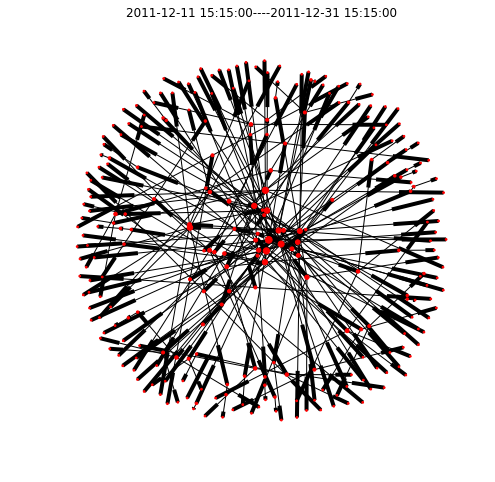

Number of nodes in graph: 265


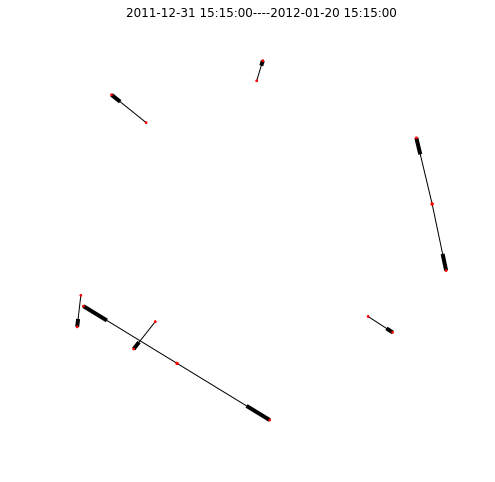

Number of nodes in graph: 16


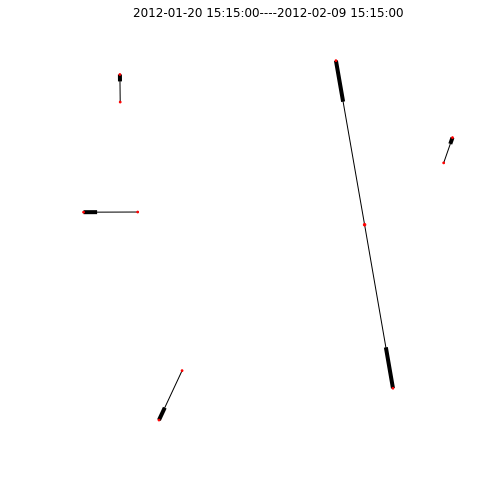

Number of nodes in graph: 11


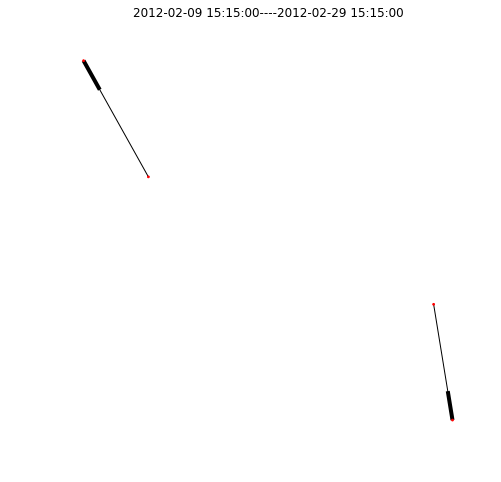

Number of nodes in graph: 4


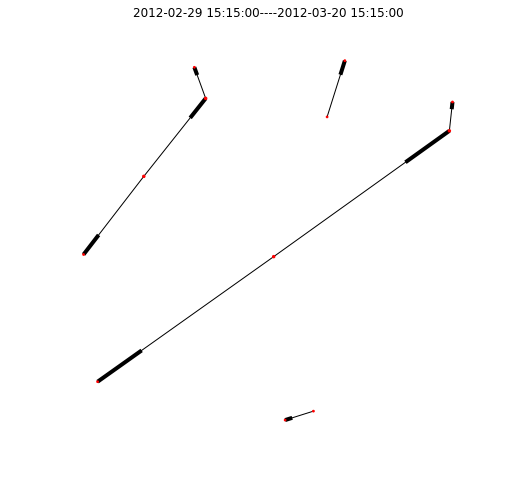

Number of nodes in graph: 12


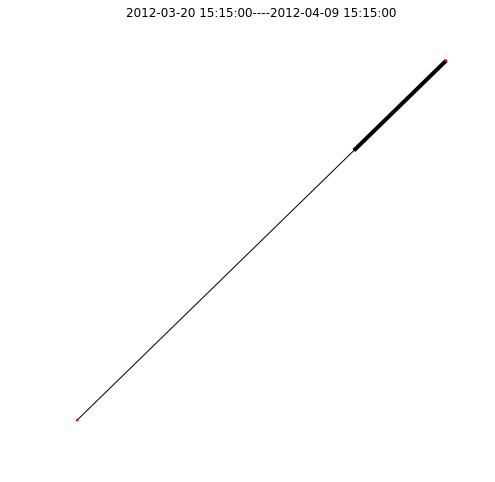

Number of nodes in graph: 2


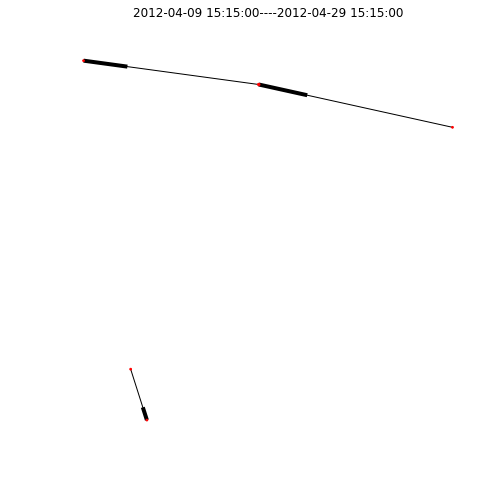

Number of nodes in graph: 5

On the interval >2012-04-29 15:15:00----2012-05-19 15:15:00< we dont have active campaign!!

On the interval >2012-05-19 15:15:00----2012-06-08 15:15:00< we dont have active campaign!!


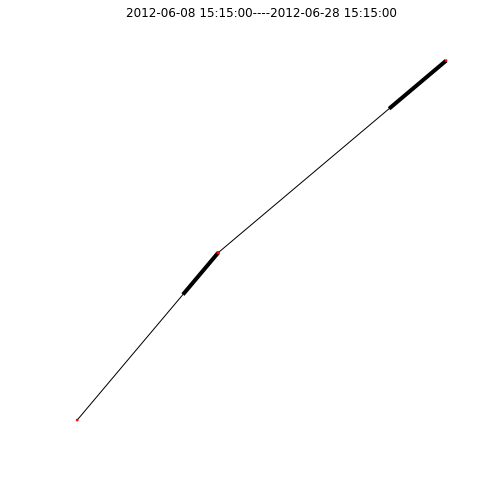

Number of nodes in graph: 3


In [20]:
S=[]
d=[]
r=[]
for i in range(10):
    V= G.subgraph(X[i])
    if(V.order()==0):
        print("\nOn the interval >"+s[i]+"----"+s[i+1]+"< we dont have active campaign!!") 
    else:
        V= G.subgraph(X[i])
        deg=nx.degree(V)
        pos = nx.spring_layout(V)
        plt.figure(1,figsize=(8,8)) 
        nx.draw_networkx_edges(V,pos, edge_color='k',arrows=True)           
        nx.draw_networkx_nodes(V, pos,nodelist=[p[0] for p in F[i]],node_size=[v * 3 for v in [p[1] for p in F[i]]],node_color='r')
        plt.title(s[i]+'----'+s[i+1])
        plt.axis('off')
        plt.show()
        print("Number of nodes in graph: %d" %V.order())

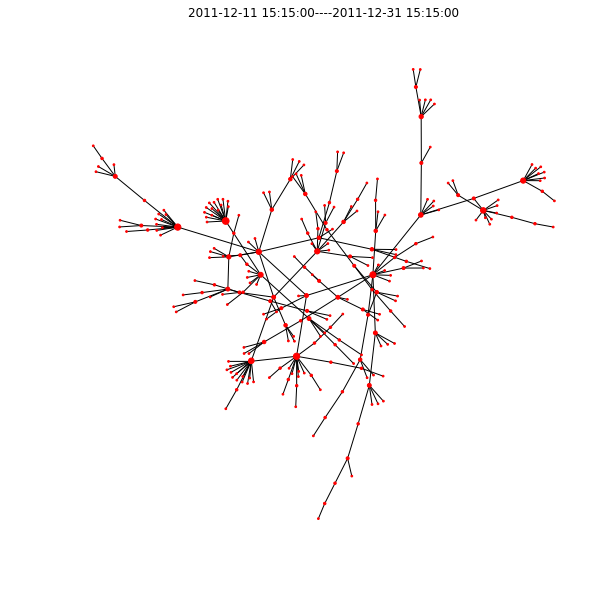

Number of nodes in graph: 265


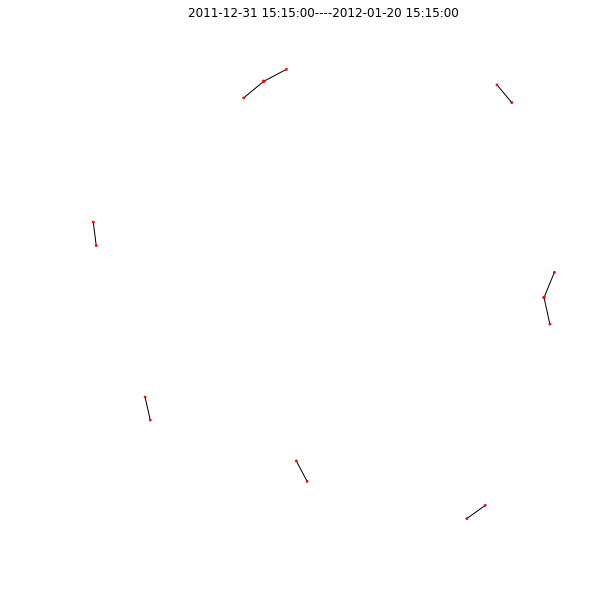

Number of nodes in graph: 16


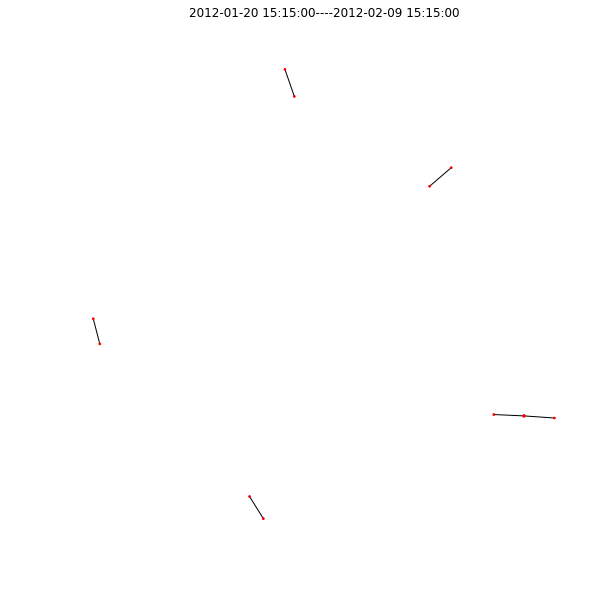

Number of nodes in graph: 11


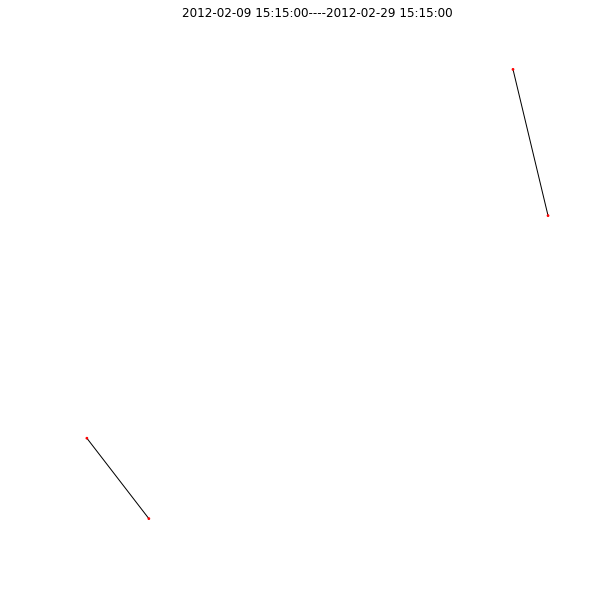

Number of nodes in graph: 4


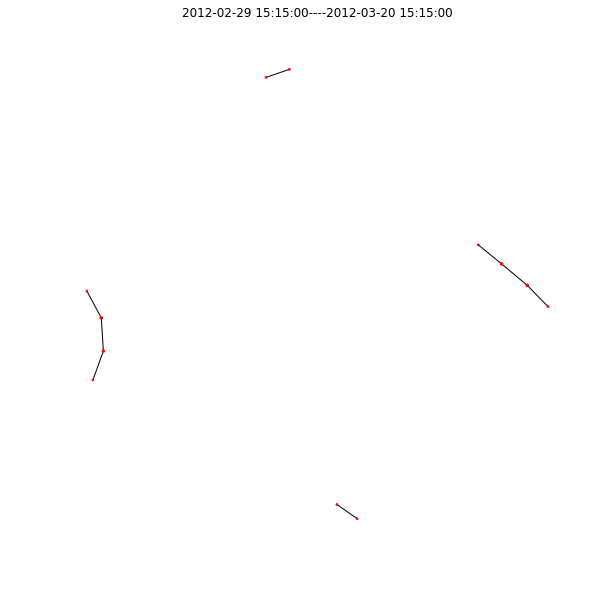

Number of nodes in graph: 12


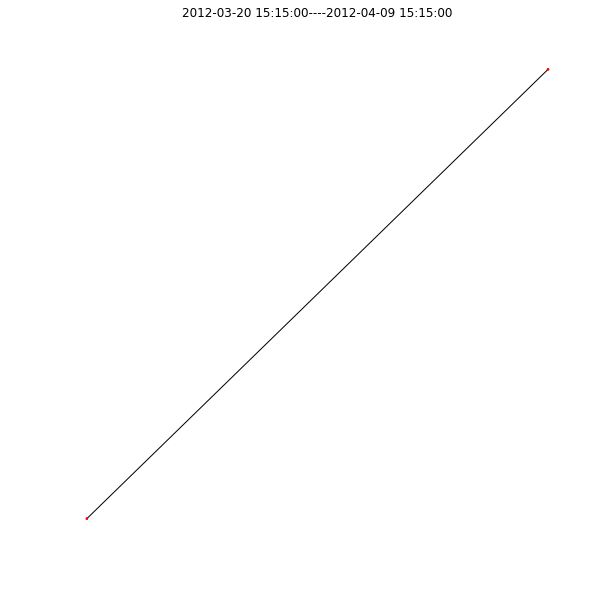

Number of nodes in graph: 2


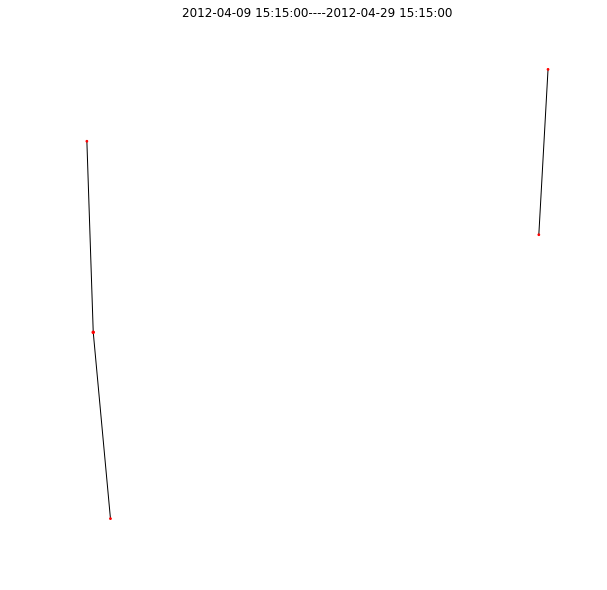

Number of nodes in graph: 5

On the interval >2012-04-29 15:15:00----2012-05-19 15:15:00< we dont have active campaign!!

On the interval >2012-05-19 15:15:00----2012-06-08 15:15:00< we dont have active campaign!!


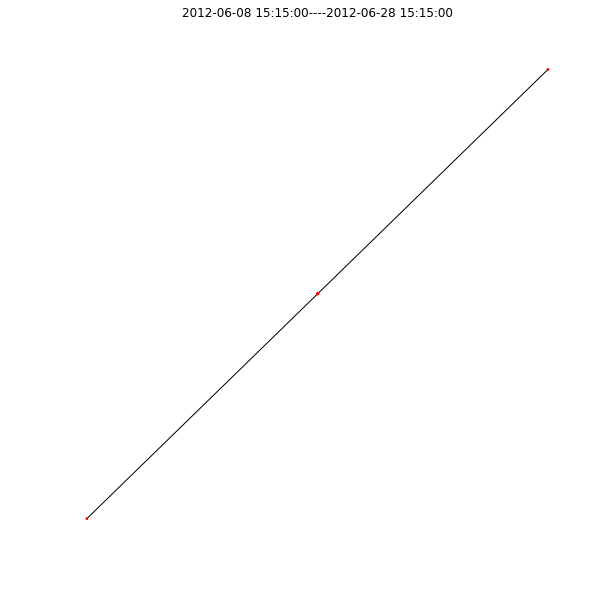

Number of nodes in graph: 3


In [21]:
S=[]
d=[]
r=[]
for i in range(10):
    V= G1.subgraph(X[i])
    if(V.order()==0):
        print("\nOn the interval >"+s[i]+"----"+s[i+1]+"< we dont have active campaign!!") 
    else:
        V= G1.subgraph(X[i])
        deg=nx.degree(V)
        pos = nx.spring_layout(V)
        plt.figure(1,figsize=(10,10)) 
        nx.draw_networkx_edges(V,pos, edge_color='k',arrows=True)           
        nx.draw_networkx_nodes(V, pos,nodelist=[p[0] for p in F[i]],node_size=[v * 3 for v in [p[1] for p in F[i]]],node_color='r')
        plt.title(s[i]+'----'+s[i+1])
        plt.axis('off')
        plt.show()
        print("Number of nodes in graph: %d" %V.order())

In [22]:
Y=[]
for node in X[0]:
    d = X[0].out_degree(node)
    if (d>1):
        Y.append([node,d])
L=[]
Y=sorted(Y, key=lambda x: x[1], reverse=True)
Y=Y[:15]
print(Y)
for u in [p[0] for p in Y]:
    L.append(u)
print("\nUsers most active in campaign 3 (first day): ")
print(len(L))

[[20552, 14], [20390, 12], [20386, 12], [20392, 11], [20431, 9], [20470, 9], [20385, 8], [20442, 8], [20495, 8], [20459, 7], [20410, 6], [20384, 5], [20387, 5], [20615, 5], [20393, 4]]

Users most active in campaign 3 (first day): 
15


In [23]:
D=[]
#D.append(20384)
for i in L:
    for j in L:
        if(i!=j):
            if(i not in D):
                D.append(i)
            if(j not in D):
                D.append(j)
            if(nx.has_path(X[0],i,j)==True):
                for k in nx.shortest_path(X[0],i,j):
                    if(k not in D):
                        D.append(k)
            else:
                continue            
print(len(D))
print(D)

19
[20552, 20390, 20386, 20392, 20431, 20470, 20385, 20442, 20495, 20459, 20410, 20384, 20387, 20615, 20393, 20469, 20433, 20394, 20435]


In [24]:
V2= G1.subgraph(D)

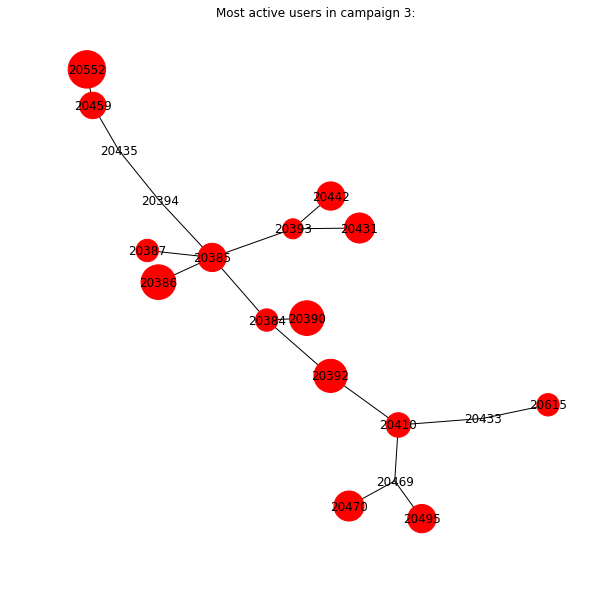

In [25]:
pos = nx.spring_layout(V2)
plt.figure(1,figsize=(10,10))     
nx.draw_networkx_edges(V2,pos, edge_color='k',arrows=True)
nx.draw_networkx_nodes(V2, pos,nodelist=[p[0] for p in Y],node_size=[v * 100 for v in [p[1] for p in Y]],node_color='r')
nx.draw_networkx_labels(V2,pos,with_labels=True)
plt.axis('off')
plt.title("Most active users in campaign 3: ")
plt.show()

In [26]:
s1 = pd.Series(pd.date_range('2011-12-11 15:15:00','2011-12-21 15:15:00',freq='1D'))

In [27]:
s1[10]

Timestamp('2011-12-21 15:15:00')

In [28]:
y[1]=y[1].as_matrix()
y[1]= pd.to_datetime(y[1])
s1=s1.apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [29]:
Time2=[]
for i in range(10):
    Time2.append(y.loc[(y[1]>=s1[i])&(y[1]<=s1[i+1])])
X2=[]
for i in range(10):
    X2.append(nx.from_pandas_dataframe(Time2[i],source=2, target=3,edge_attr=True,create_using=nx.DiGraph())) 
for i in range(10):
    print(X2[i].order(),X2[i].size())

156 155
38 25
36 24
7 4
5 3
7 4
6 4
0 0
2 1
8 6


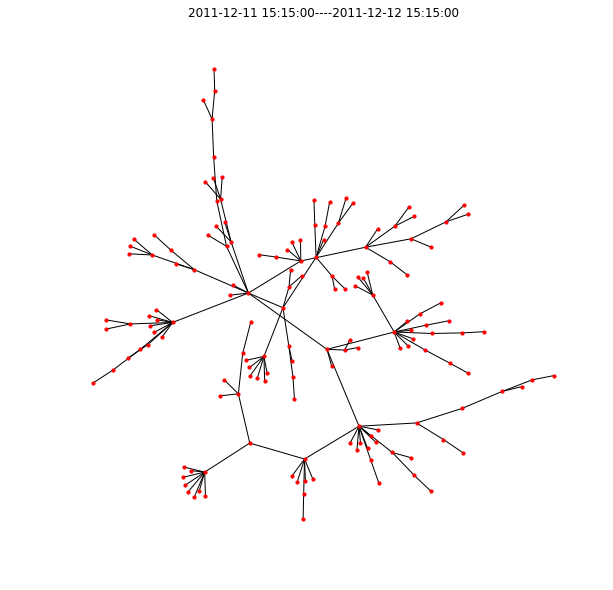

Number of nodes in graph: 156
Diameter: 13
Radius: 7


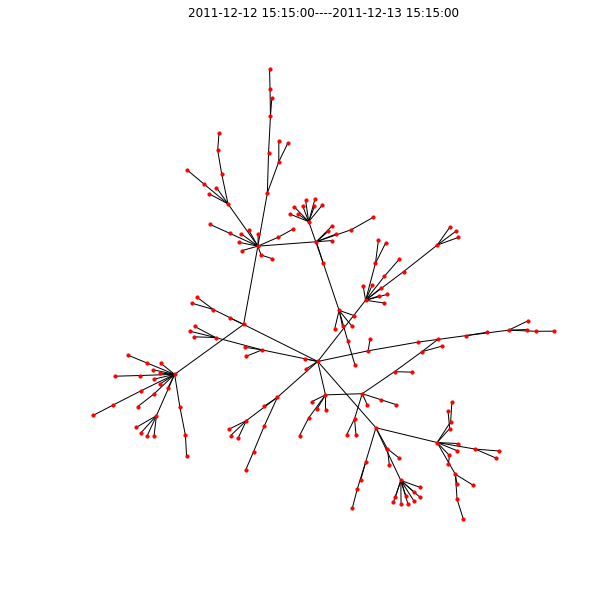

Number of nodes in graph: 181
Diameter: 13
Radius: 7


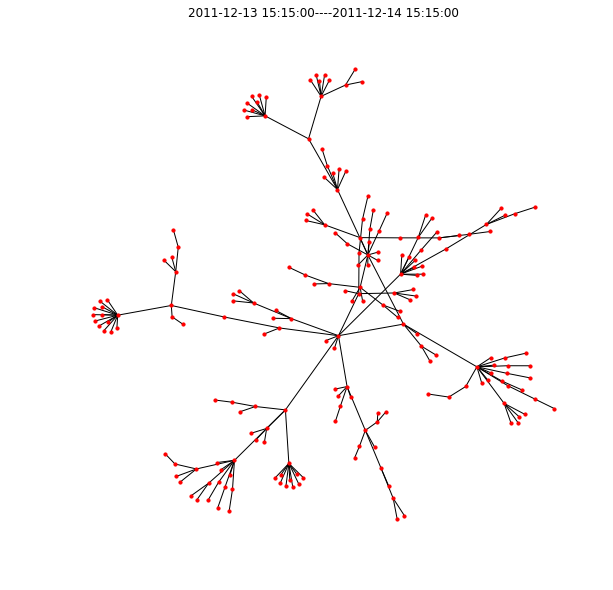

Number of nodes in graph: 205
Diameter: 13
Radius: 7


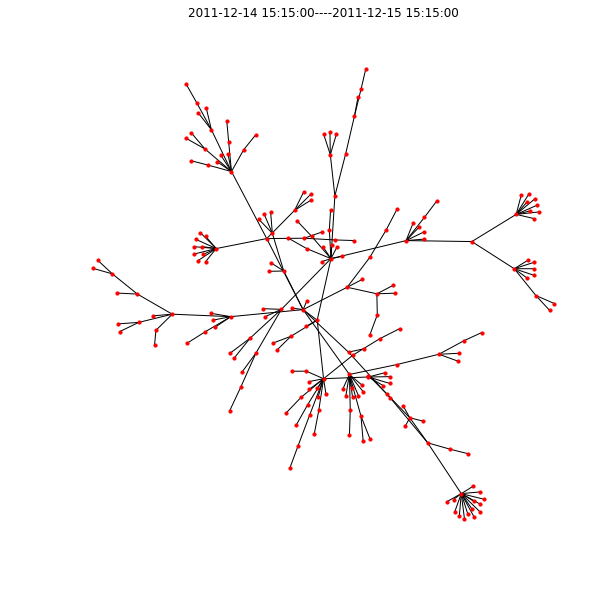

Number of nodes in graph: 209
Diameter: 13
Radius: 7


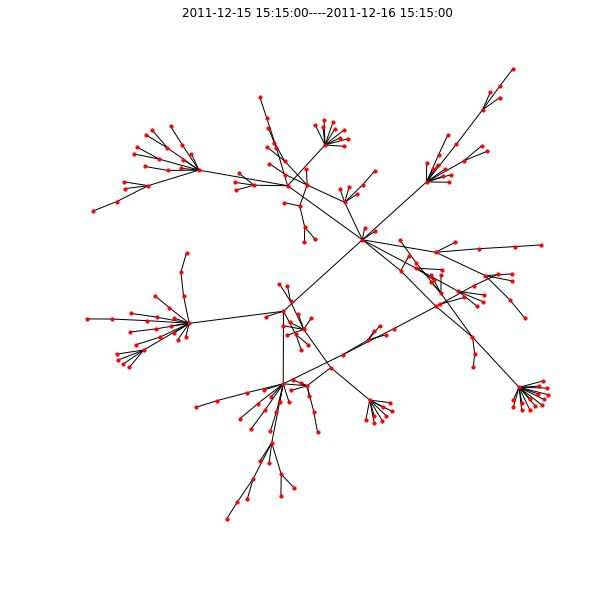

Number of nodes in graph: 212
Diameter: 13
Radius: 7


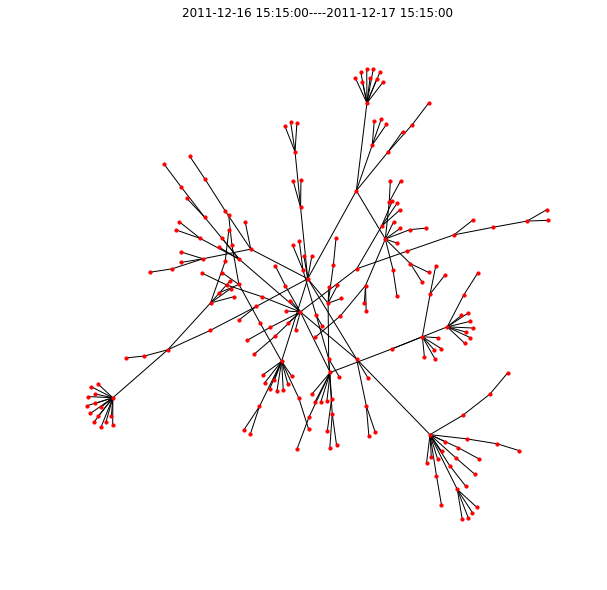

Number of nodes in graph: 216
Diameter: 14
Radius: 7


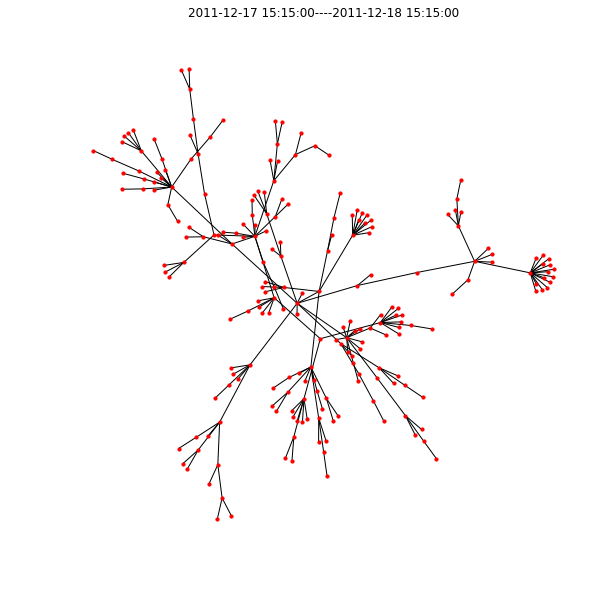

Number of nodes in graph: 220
Diameter: 14
Radius: 7


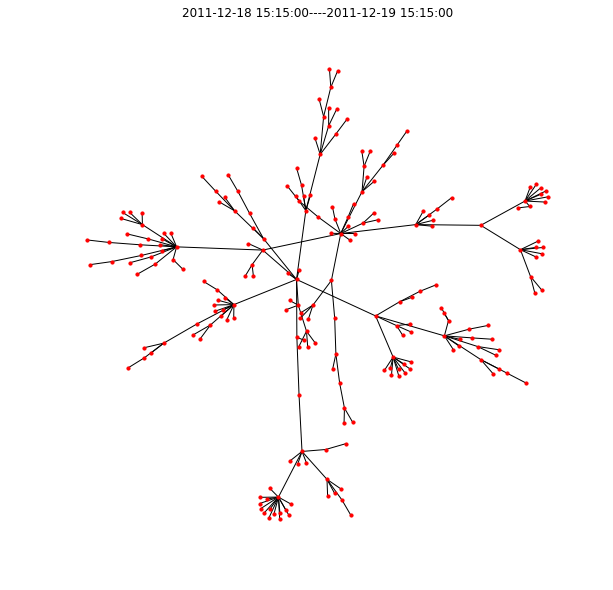

Number of nodes in graph: 220
Diameter: 14
Radius: 7


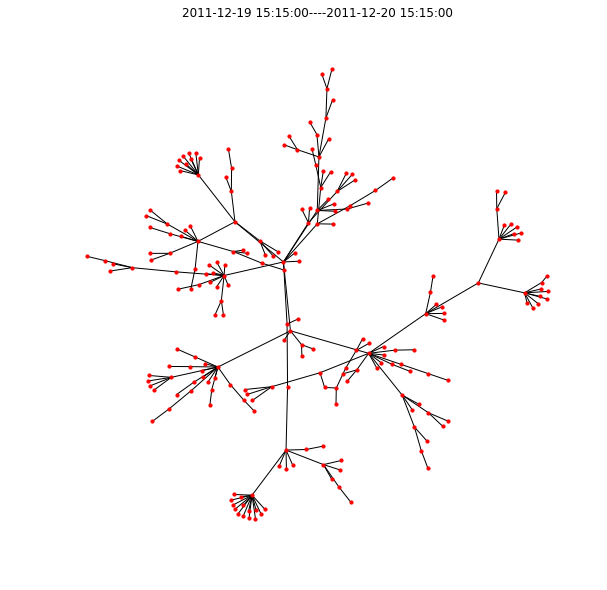

Number of nodes in graph: 221
Diameter: 14
Radius: 7


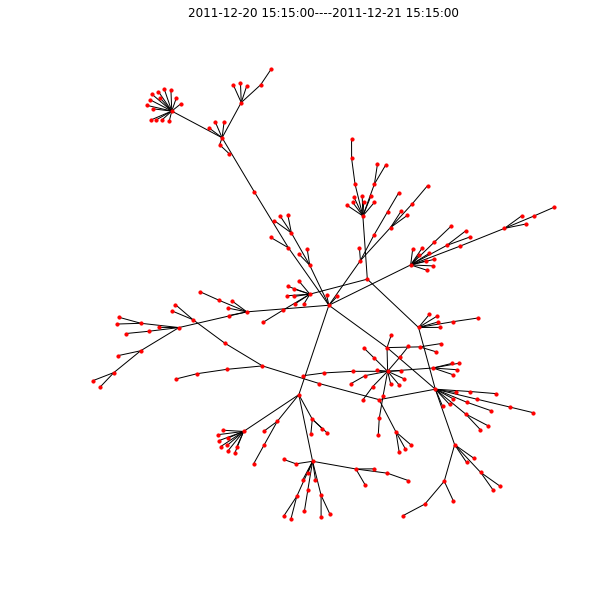

Number of nodes in graph: 227
Diameter: 14
Radius: 7


In [30]:
S=[]
d=[]
r=[]
P=nx.Graph()
for i in range(10):
    for j in range(i+1):
        P=nx.compose(P,X2[j])
    V= G1.subgraph(P)
    pos = nx.spring_layout(V)
    plt.figure(1,figsize=(10,10)) 
    nx.draw_networkx_edges(V,pos, edge_color='k',arrows=True)
    nx.draw_networkx_nodes(V,pos, node_size=10,node_color='r')
    plt.title(s1[i]+'----'+s1[i+1])
    plt.axis('off')
    plt.savefig('c3'+str(i+1)+'.png')
    plt.show()
    S.append(max(nx.connected_component_subgraphs(V),key=len))
    print("Number of nodes in graph: %d" %V.order())
    d.append(nx.diameter(S[i]))
    print("Diameter:", d[i])
    r.append(nx.radius(S[i]))                         
    print("Radius:", r[i])